In [1]:
import sys
sys.path.append('../')
import numpy as np
import matplotlib
# %matplotlib widget

from rover_simulator.core import Obstacle, SensingPlanner
from rover_simulator.sensor import ImaginalSensor, NoisySensor
from rover_simulator.world import World
from rover_simulator.rover import OnlinePathPlanningRover, RoverAnimation
from rover_simulator.history import SimpleHistory
from rover_simulator.collision_detector import CollisionDetector
from rover_simulator.navigation.sensing_planner import SimpleSensingPlanner
from rover_simulator.navigation.localizer import ImaginalLocalizer, NoisyLocalizer
from rover_simulator.navigation.controller import DwaController, PathFollower, ArcPathController
from rover_simulator.navigation.mapper import GridMapper
from rover_simulator.navigation.path_planner.grid_base import FieldDstar

In [2]:
world = World()
world.read_objects("../../rover_simulator/examples/environment_simple.txt")

In [3]:
world.reset(reset_obstacles=False)

grid_width = 0.5
sensor = ImaginalSensor(obstacles=world.obstacles, fov=np.pi/2)
mapper = GridMapper(grid_size=np.array([20, 20]), grid_width=grid_width, sensor=sensor, rover_r=0.5)
goal_pos = np.array([18, 5])

history = SimpleHistory(
    sensor_range = sensor.range,
    sensor_fov = sensor.fov
)
rover = OnlinePathPlanningRover(
    np.array([1.0, 2.0, 0.0]), 0.5,
    sensor=sensor,
    path_planner = FieldDstar(np.array([1.0, 2.0, 0.0]), goal_pos=goal_pos, mapper=mapper),
    mapper = mapper,
    #controller = PathFollower(),
    controller=ArcPathController(rover_r=0.5),
    localizer = ImaginalLocalizer(),
    collision_detector = CollisionDetector(world.obstacles),
    sensing_planner = SimpleSensingPlanner(sense_interval_distance=9.0, sense_interval_angle=np.pi/4.5),
    history=history,
    color="black",
    goal_pos=goal_pos,
    waypoint_dist=1.0
)

# rover.path_planner.set_map(rover.mapper)
rover.waypoints = rover.path_planner.calculate_path()

world.append_rover(rover)

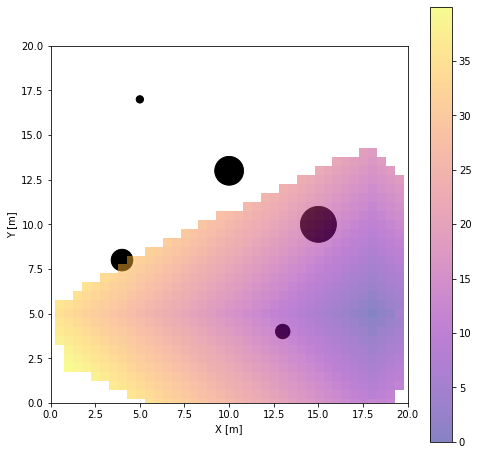

In [4]:
rover.path_planner.draw([0, 20], [0, 20], obstacles=world.obstacles)

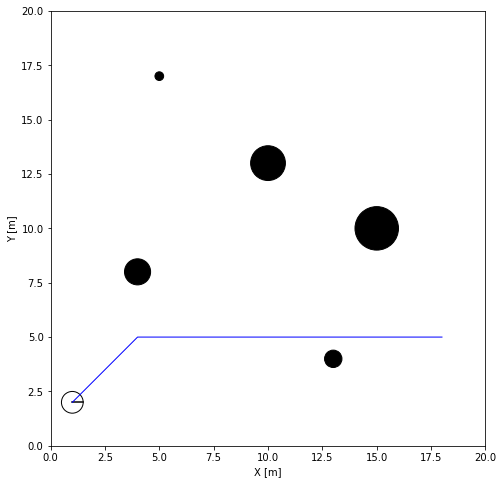

In [5]:
world.draw([0, 20], [0, 20], draw_waypoints_flag=True)

In [6]:
world.simulate(200)

  0%|          | 0/200 [00:00<?, ?it/s]

AttributeError: 'FieldDstar' object has no attribute 'update_path'

In [ ]:
world.draw([0, 20], [0, 20])